# **Sentiment Analysis using Traditional and Deep Learning Models**

**I. Dataset Selection and Exploratory Data Analysis**

**A.Importing Libraries**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_auc_score, roc_curve, 
                             classification_report, log_loss)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
# Downloading NLTK resources
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**B. Loading the Dataset**

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data/rt_reviews.csv', encoding='latin1')


In [20]:
print(df.head())

  Freshness                                             Review
0     fresh   Manakamana doesn't answer any questions, yet ...
1     fresh   Wilfully offensive and powered by a chest-thu...
2    rotten   It would be difficult to imagine material mor...
3    rotten   Despite the gusto its star brings to the role...
4    rotten   If there was a good idea at the core of this ...


**C.Exploratory Data Analysis: Basic Statistics**

In [21]:
# --- Basic Statistics ---
print(df['Freshness'].value_counts())
print(df['Review'].str.len().describe())


Freshness
fresh     240000
rotten    240000
Name: count, dtype: int64
count    480000.000000
mean        131.729433
std          54.873626
min          18.000000
25%          90.000000
50%         130.000000
75%         170.000000
max         287.000000
Name: Review, dtype: float64


**D. Data Cleaning**

In [22]:
# --- Missing Values ---
print(df.isnull().sum())

Freshness    0
Review       0
dtype: int64


In [23]:
df = df.drop_duplicates(keep='first')

In [24]:
# --- Duplicates ---
print(df.duplicated().sum())

0


In [25]:
# --- Dataframe Info ---
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 339716 entries, 0 to 479999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Freshness  339716 non-null  object
 1   Review     339716 non-null  object
dtypes: object(2)
memory usage: 7.8+ MB
None


**E. Data Visualizations**

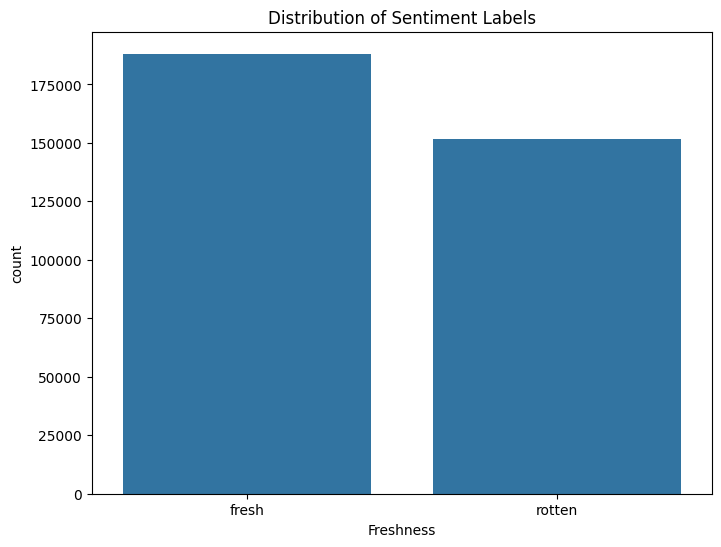

In [26]:
# --- Class Distributions ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Freshness', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()



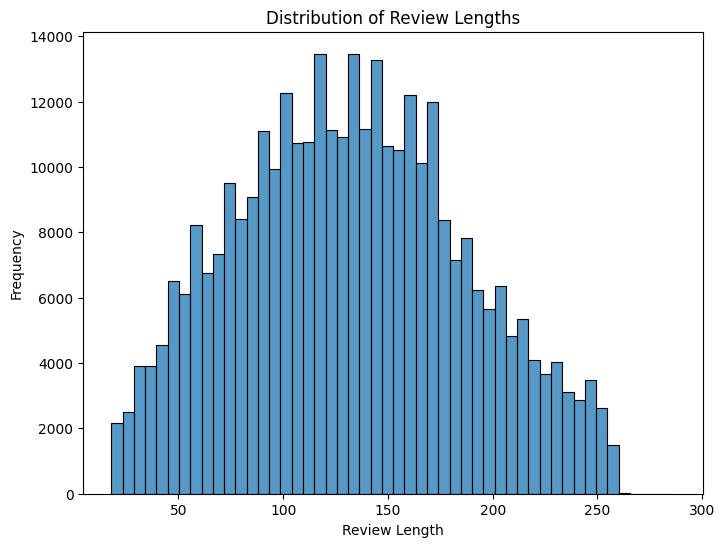

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Review'].str.len(), bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()



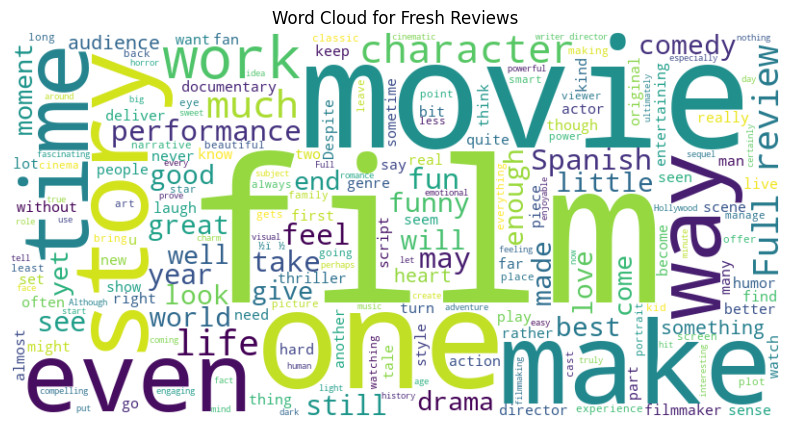

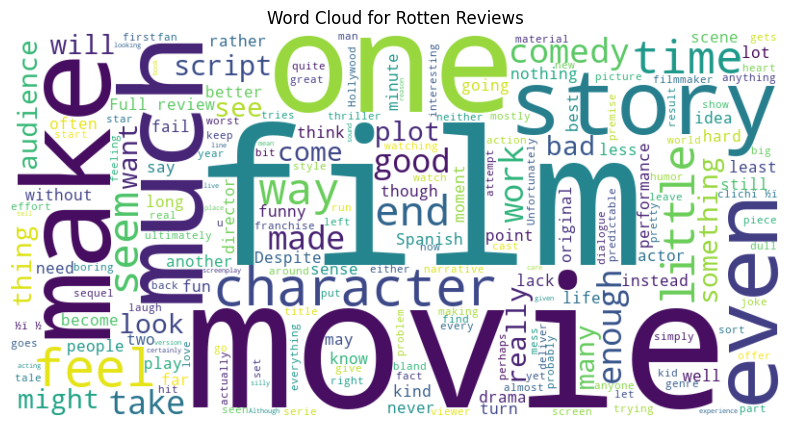

In [28]:
# --- Word Clouds ---
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

positive_reviews = ' '.join(df[df['Freshness'] == 'fresh']['Review']) 
negative_reviews = ' '.join(df[df['Freshness'] == 'rotten']['Review']) 
create_wordcloud(positive_reviews, 'Word Cloud for Fresh Reviews')
create_wordcloud(negative_reviews, 'Word Cloud for Rotten Reviews')



In [30]:
# --- Data Inspection ---
print("First 5 reviews:")
print(df['Review'].head())



First 5 reviews:
0     Manakamana doesn't answer any questions, yet ...
1     Wilfully offensive and powered by a chest-thu...
2     It would be difficult to imagine material mor...
3     Despite the gusto its star brings to the role...
4     If there was a good idea at the core of this ...
Name: Review, dtype: object


In [31]:
# --- Text Cleaning ---
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)  # Remove punctuation
    text = text.lower()  # Lowercasing
    text = [word for word in text.split() if word not in stop_words]  # Remove stopwords
    text = ' '.join(text)
    return text

df['cleaned_text'] = df['Review'].apply(clean_text)

print("\nFirst 5 cleaned reviews:")
print(df['cleaned_text'].head())


First 5 cleaned reviews:
0    manakamana doesnt answer questions yet makes p...
1    wilfully offensive powered chestthumping machi...
2    would difficult imagine material wrong spade l...
3    despite gusto star brings role hard ride shotg...
4    good idea core film buried unsightly pile flat...
Name: cleaned_text, dtype: object


### Preprocessing

 Convert labels to numeric (fresh = 1, rotten = 0)

In [32]:
df['Freshness'] = df['Freshness'].map({'fresh': 1, 'rotten': 0})

In [33]:
df.head()

,Freshness,Review,cleaned_text
0,1,"Manakamana doesn't answer any questions, yet ...",manakamana doesnt answer questions yet makes p...
1,1,Wilfully offensive and powered by a chest-thu...,wilfully offensive powered chestthumping machi...
2,0,It would be difficult to imagine material mor...,would difficult imagine material wrong spade l...
3,0,Despite the gusto its star brings to the role...,despite gusto star brings role hard ride shotg...
4,0,If there was a good idea at the core of this ...,good idea core film buried unsightly pile flat...


#### Converting the cleaned text into TF-IDF vectors

In [36]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X = vectorizer.fit_transform(df["cleaned_text"])

# Convert to dense format
X = X.toarray()

In [40]:
# Extract the target value
y = df["Freshness"]

 Split Data into Training and Testing Sets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train the Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)


LogisticRegression()

In [44]:
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class (1)


In [45]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (Positive Predictive Value)
precision = precision_score(y_test, y_pred)

# Recall (Sensitivity, True Positive Rate)
recall = recall_score(y_test, y_pred)

# F1 Score (Harmonic mean of Precision and Recall)
f1 = f1_score(y_test, y_pred)

# Log Loss (Better for probability-based models)
logloss = log_loss(y_test, y_prob)

# ROC AUC Score (Measures model’s ability to distinguish between classes)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Display all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", class_report)


Accuracy: 0.7751
Precision: 0.7828
Recall: 0.8182
F1 Score: 0.8001
Log Loss: 0.4700
ROC AUC Score: 0.8557

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74     30576
           1       0.78      0.82      0.80     37368

    accuracy                           0.78     67944
   macro avg       0.77      0.77      0.77     67944
weighted avg       0.77      0.78      0.77     67944



### Confusion Matrix

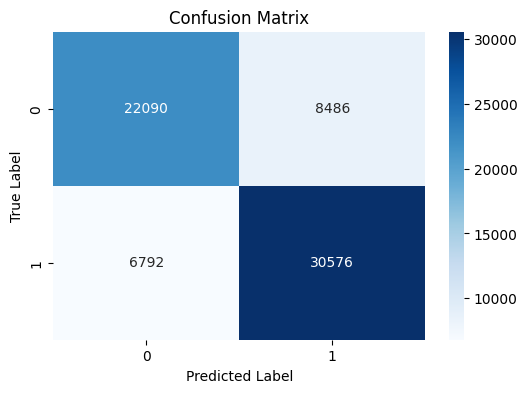

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Save  Pickle version

In [49]:
import pickle

with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully with pickle!")


Model saved successfully with pickle!
